<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
df = pd.read_csv(path + '/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


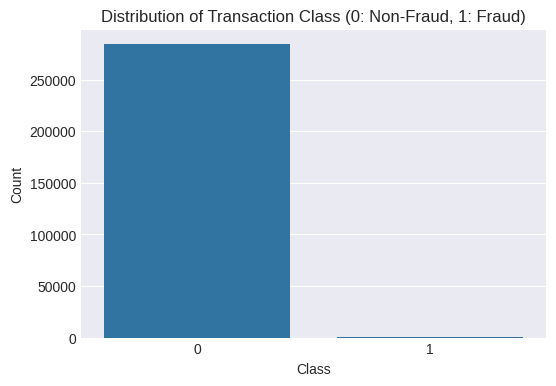

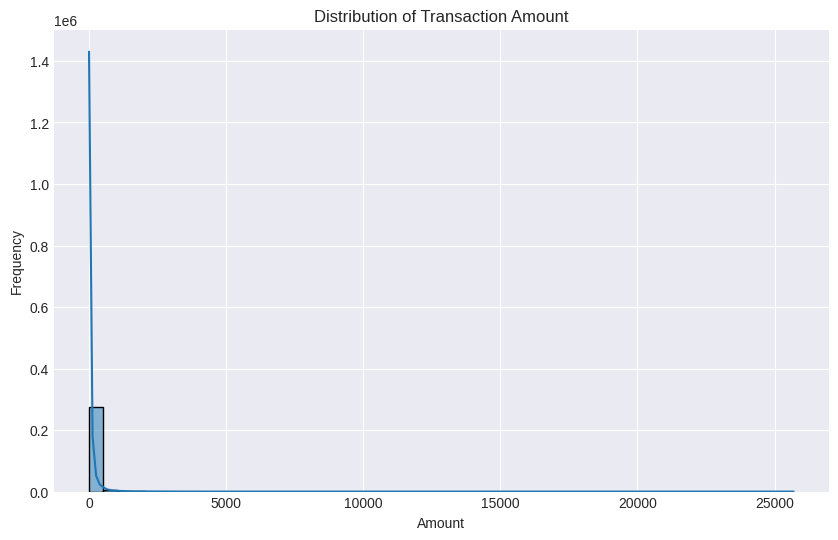

In [ ]:
# Set a style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

# Visualize the distribution of the 'Class' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

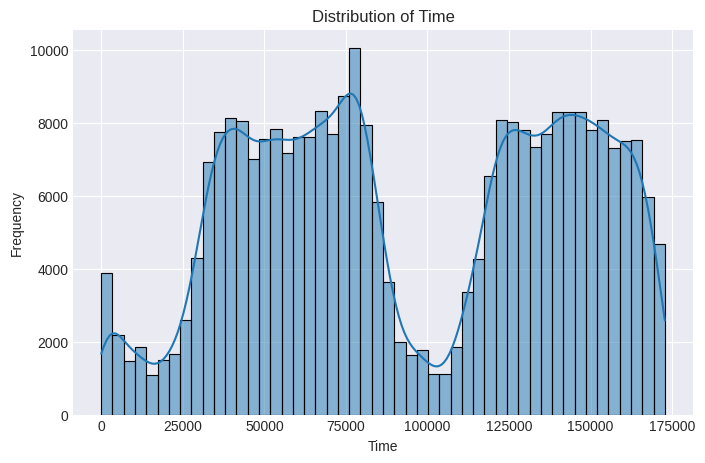

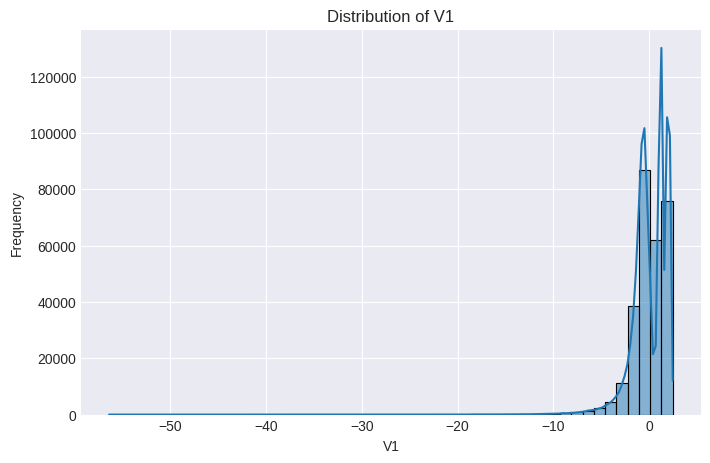

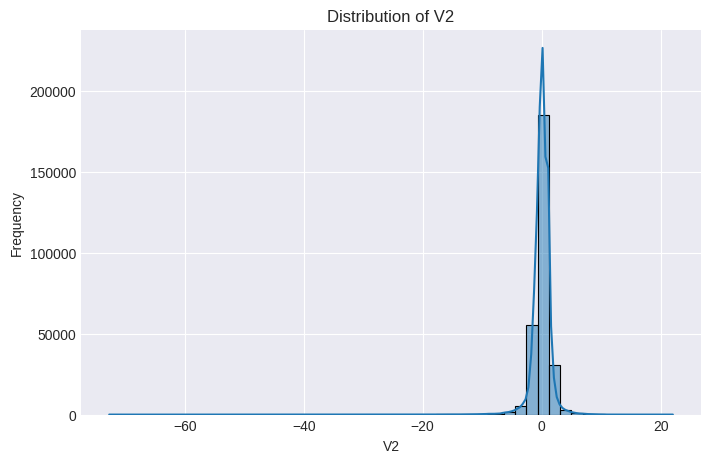

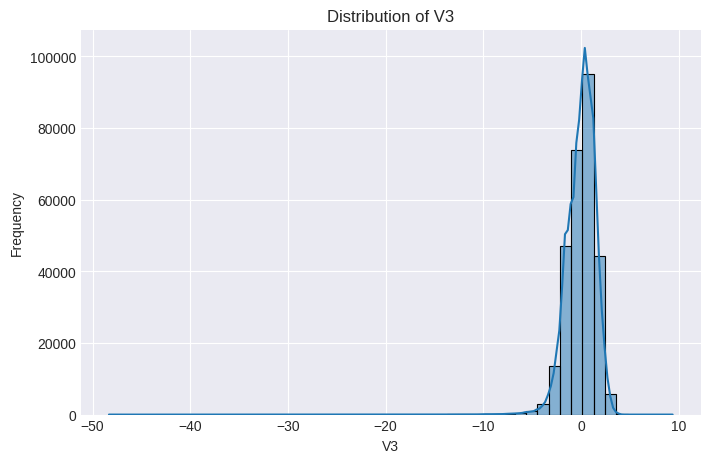

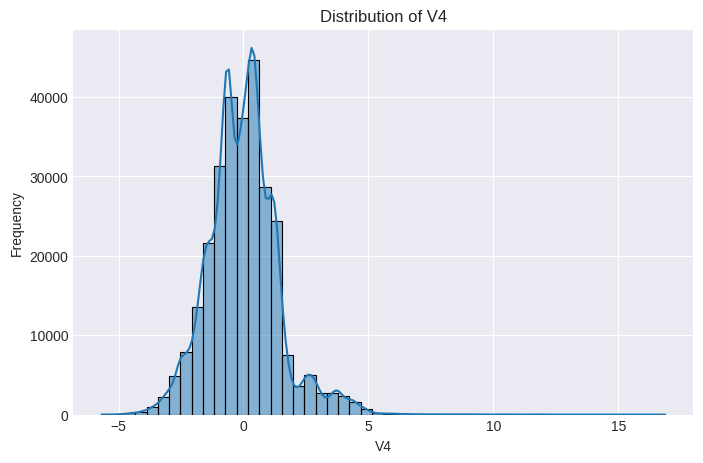

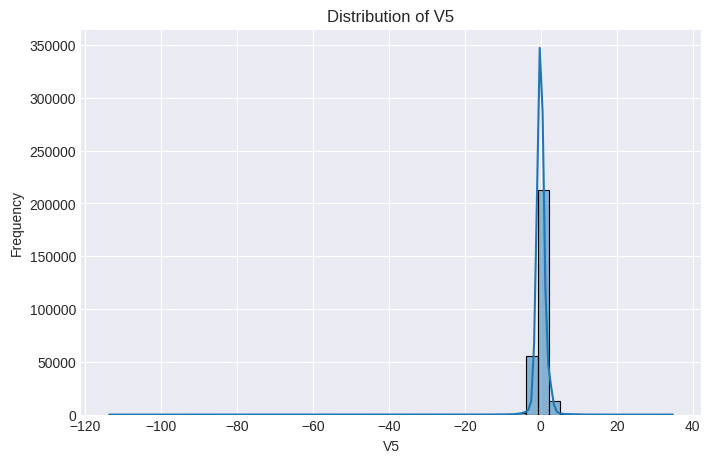

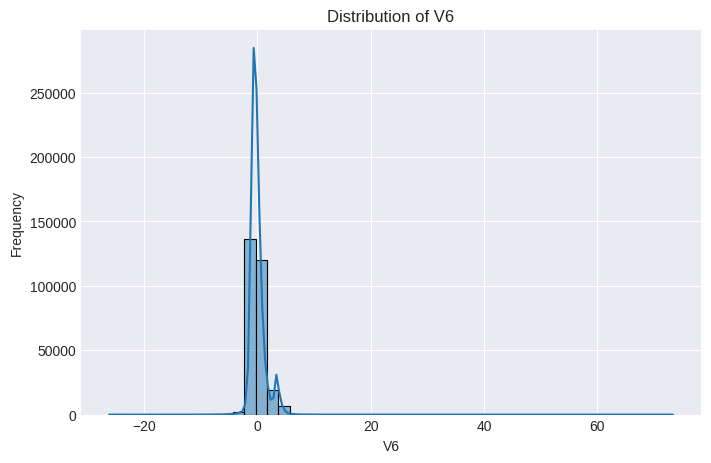

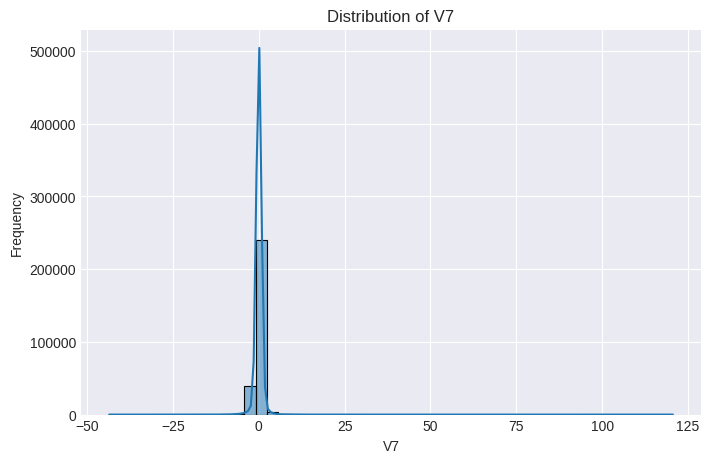

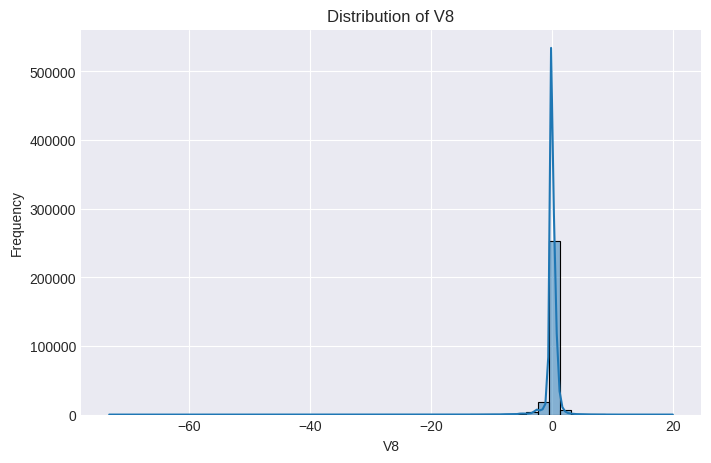

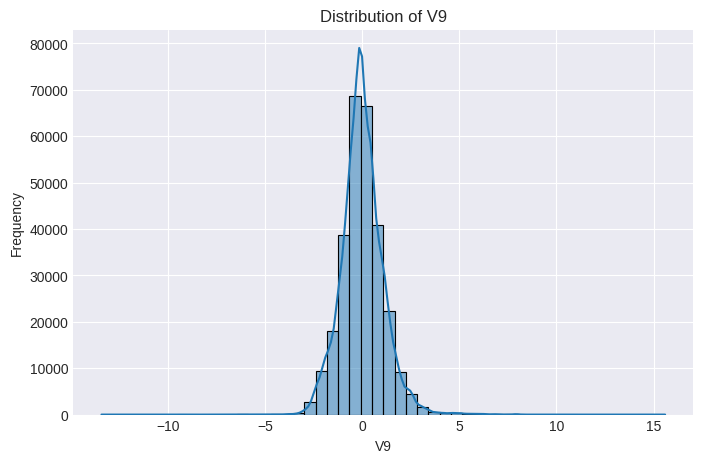

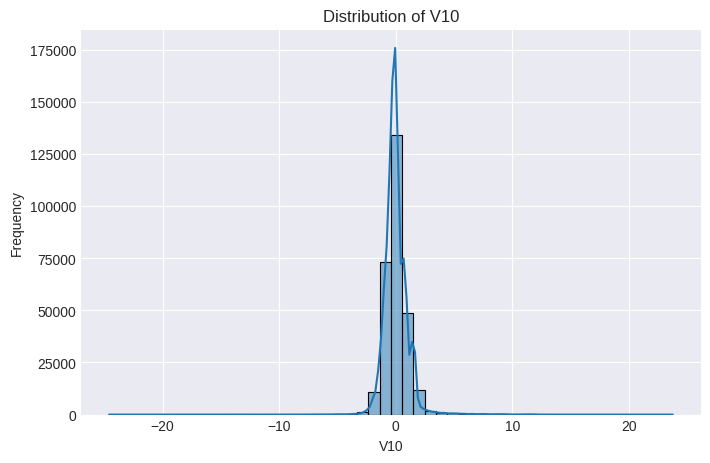

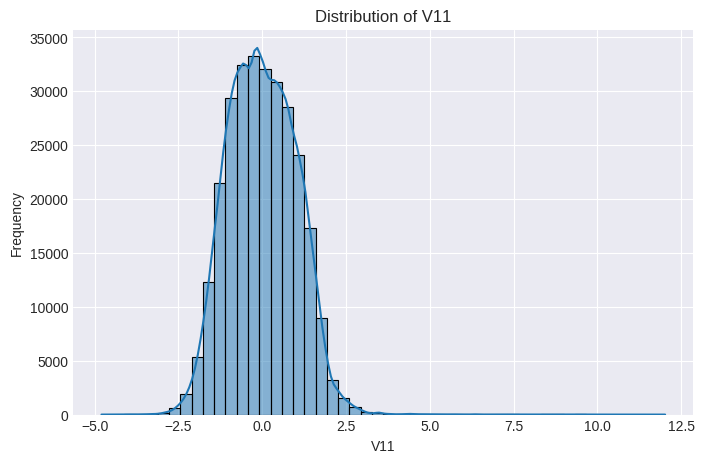

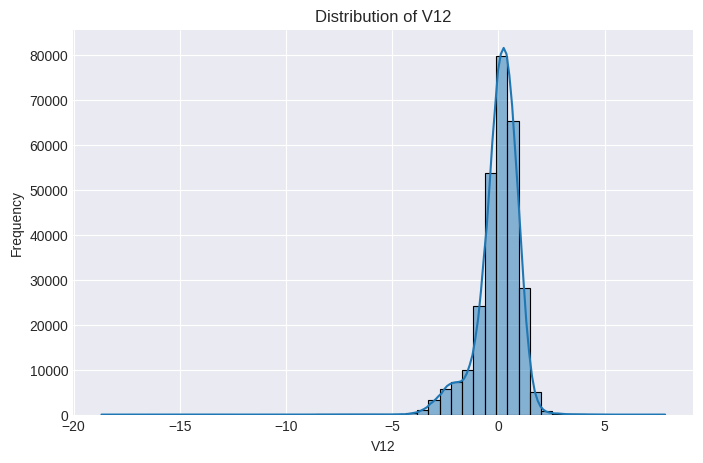

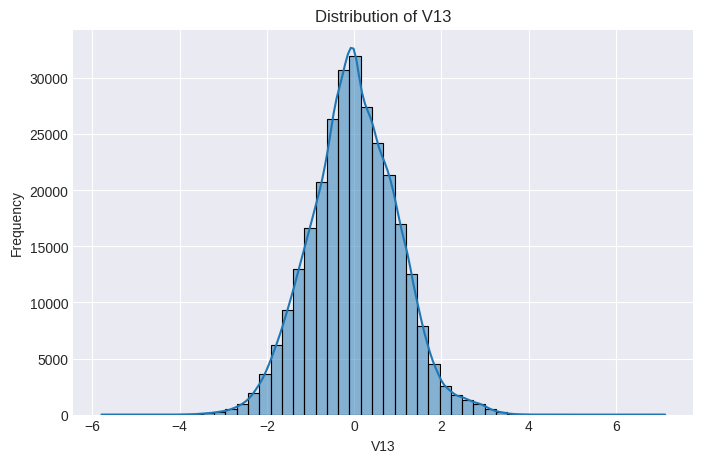

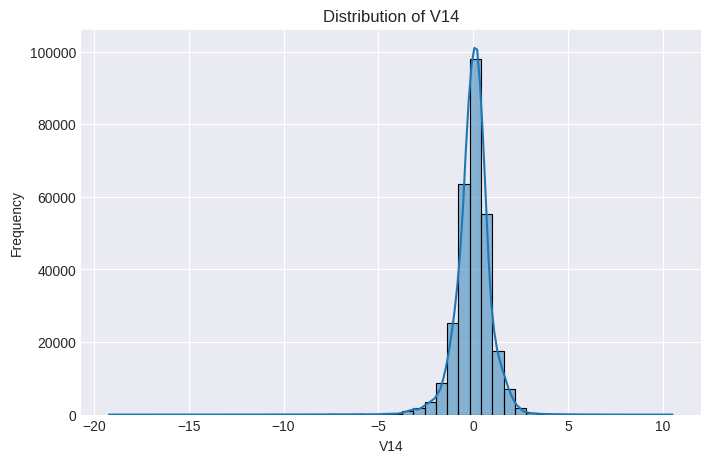

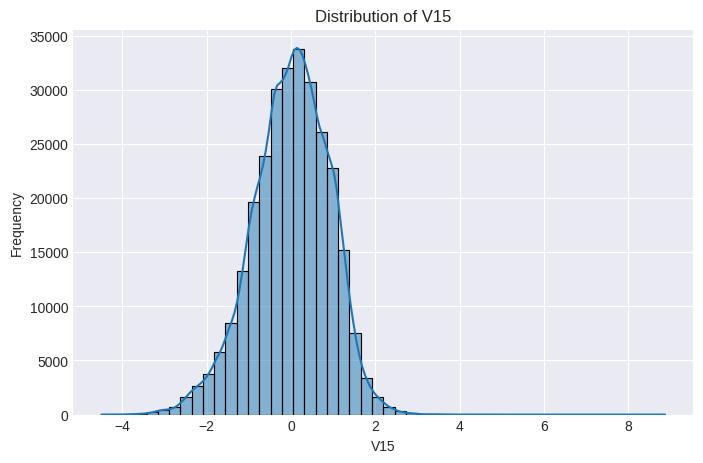

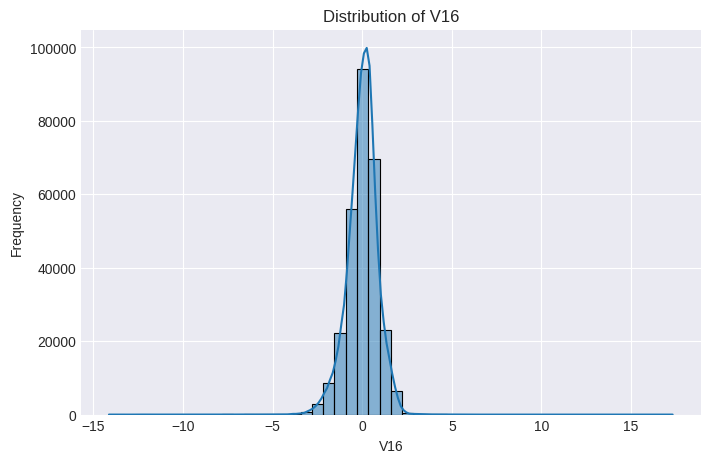

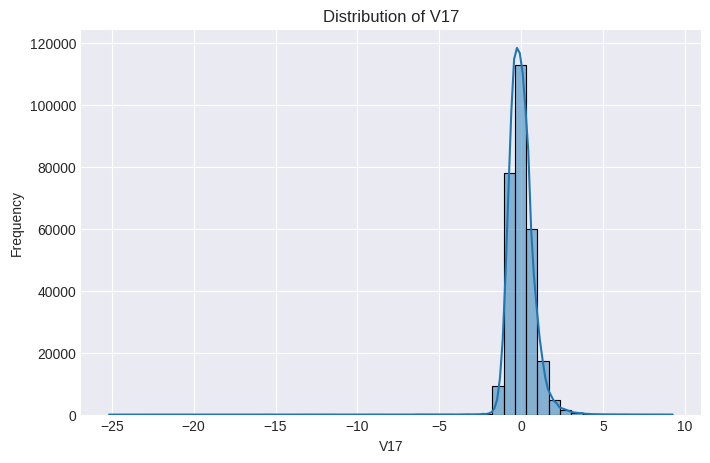

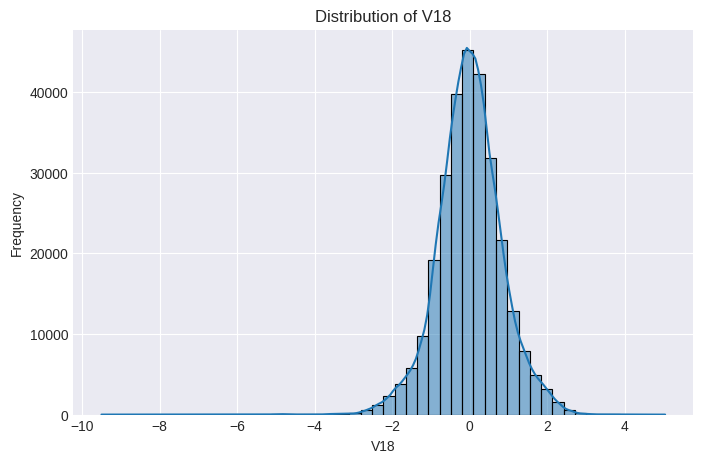

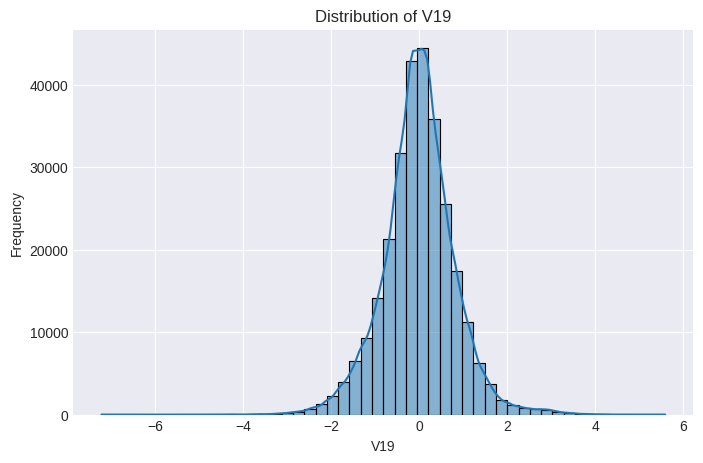

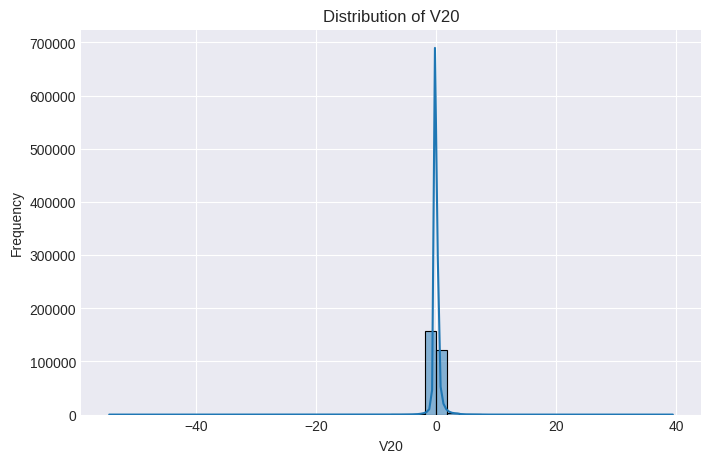

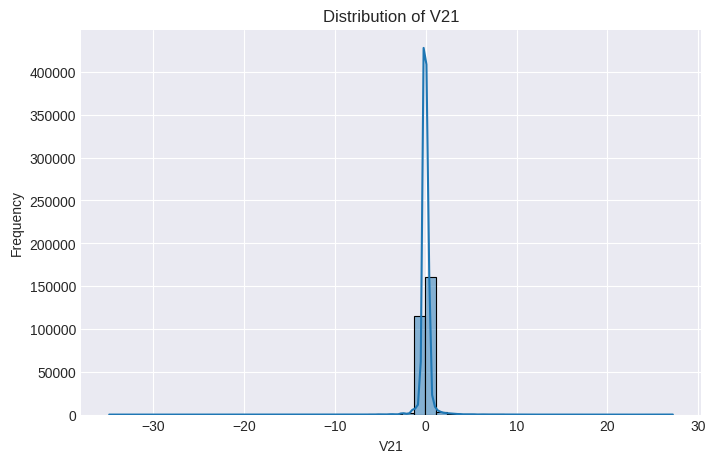

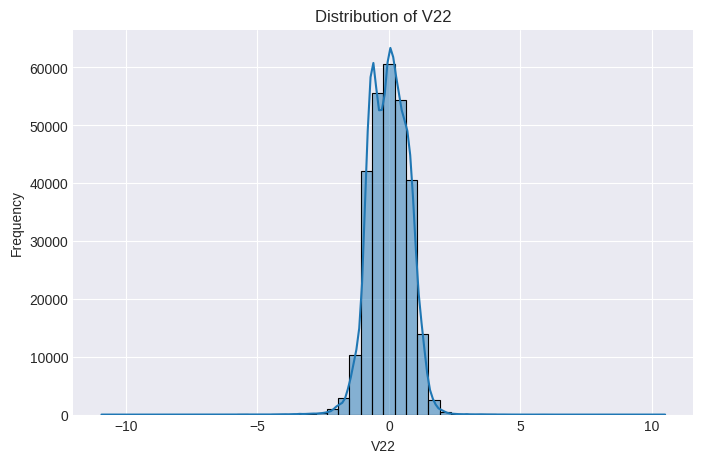

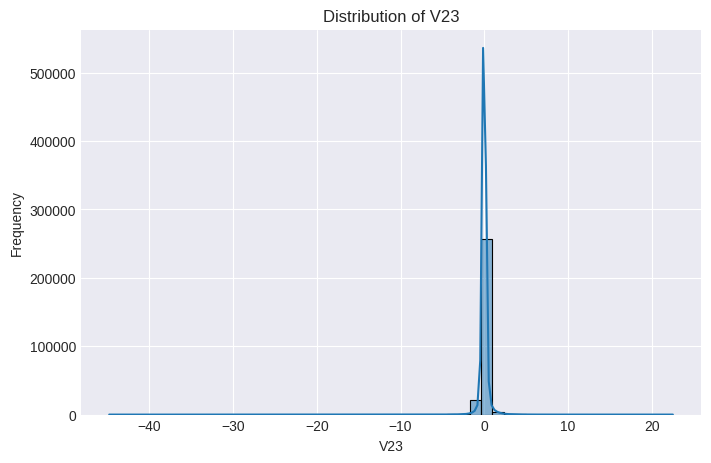

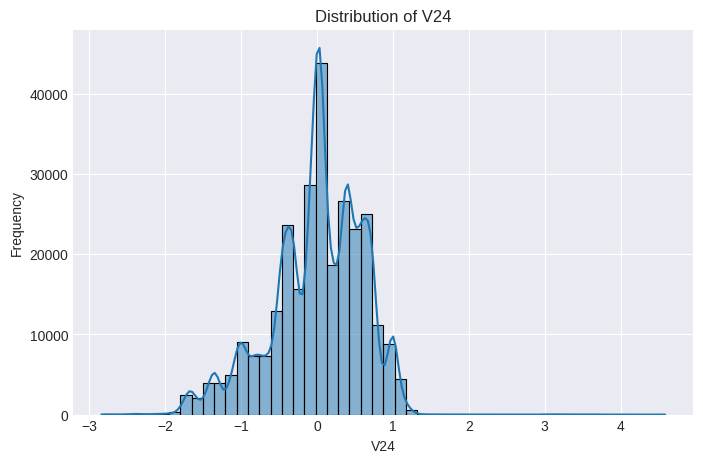

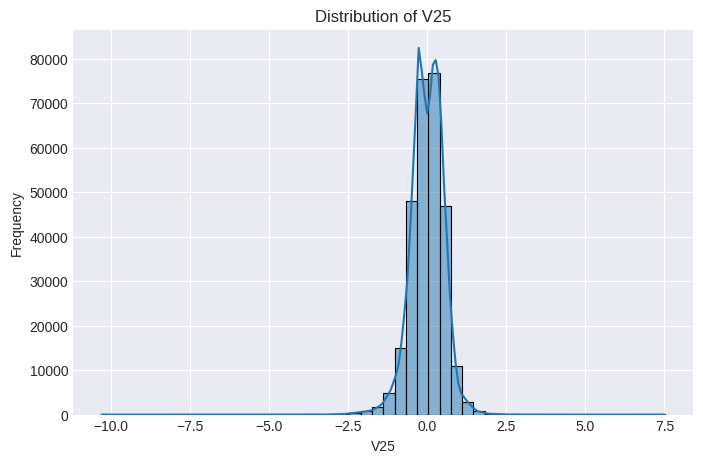

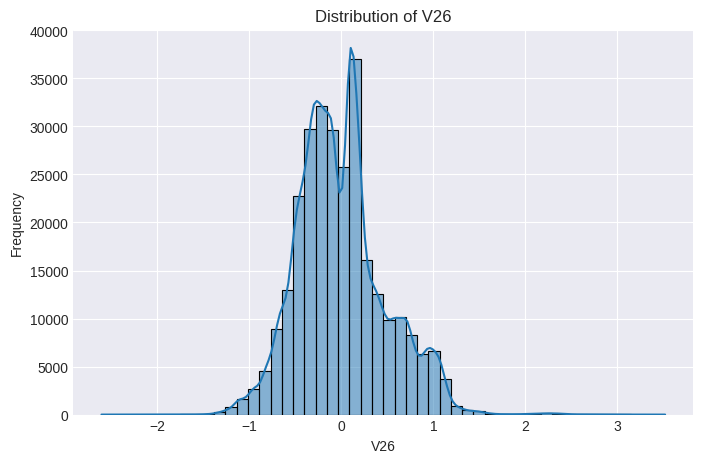

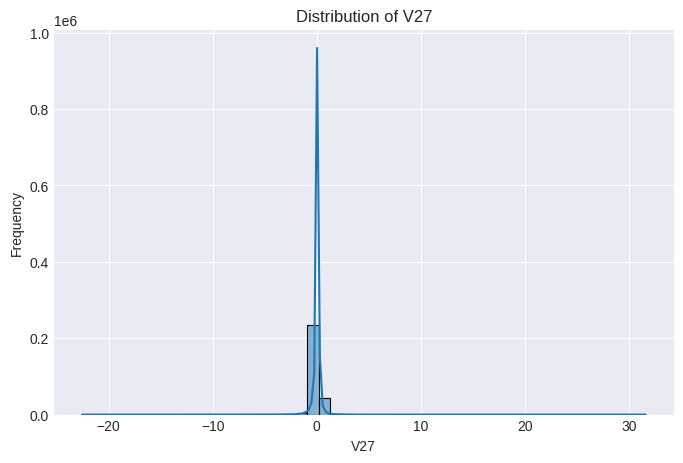

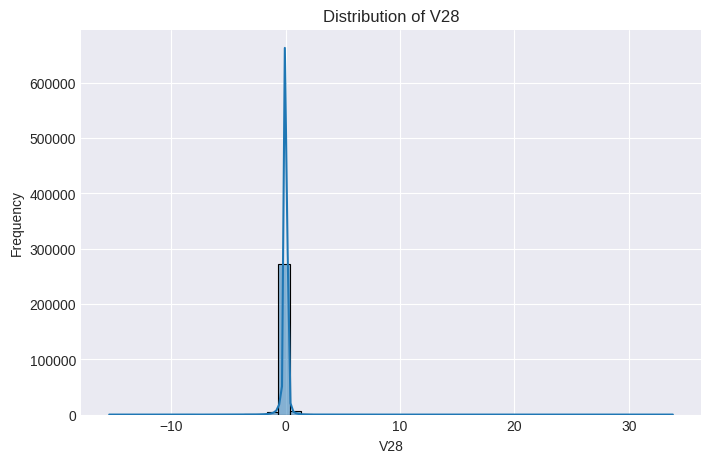

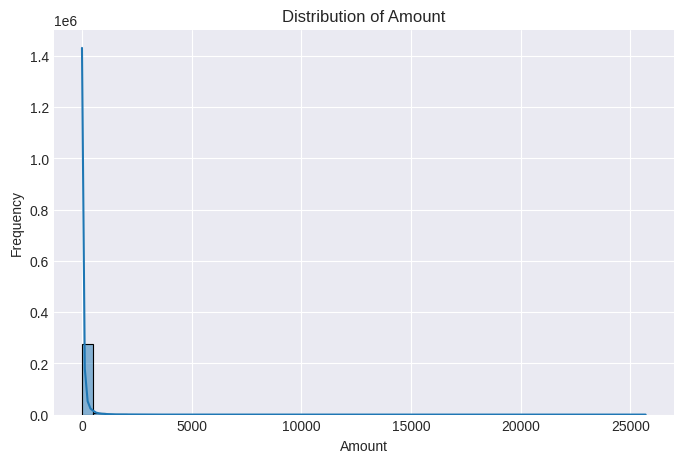

In [ ]:
for column in df.columns:
    if column != 'Class':
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=50, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

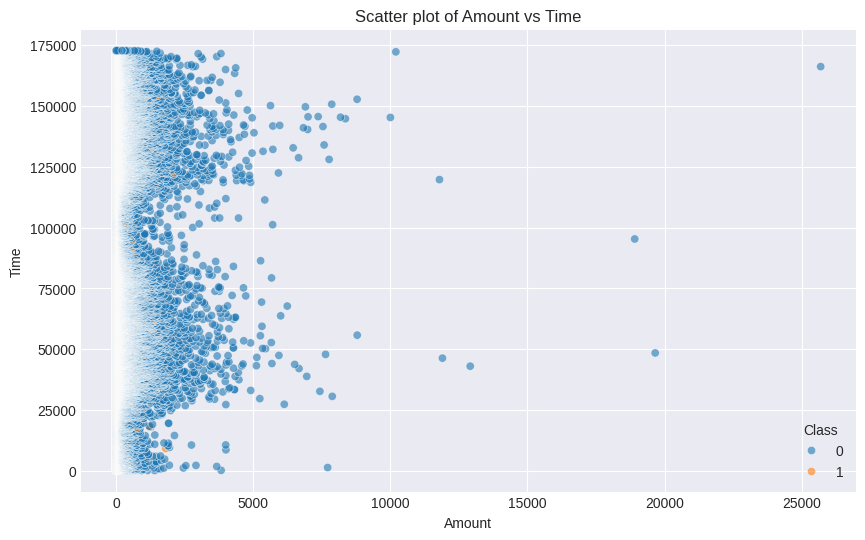

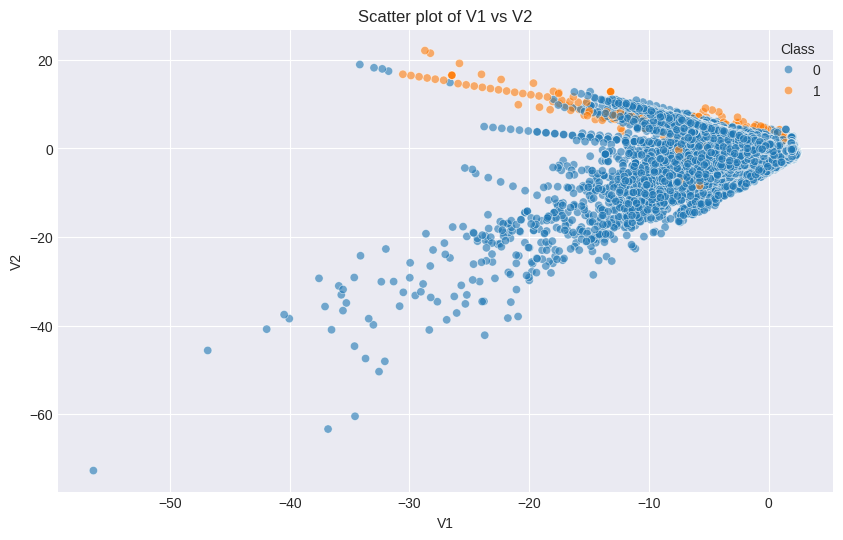

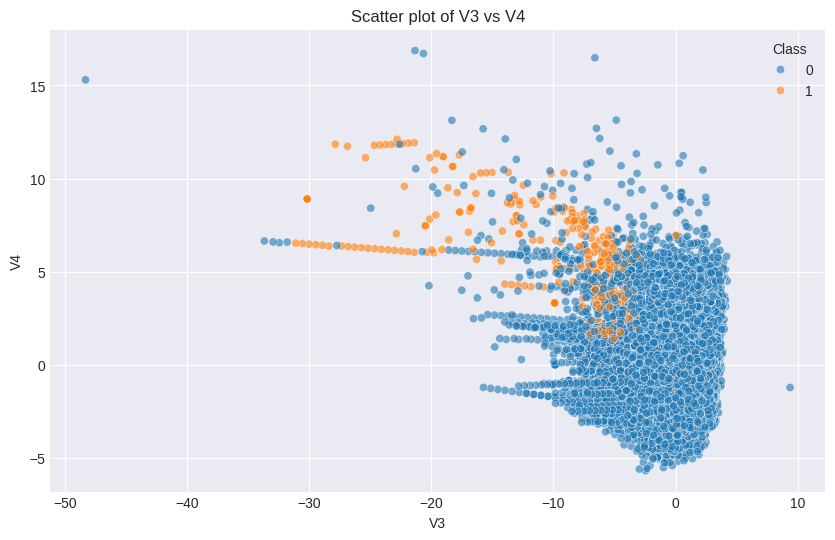

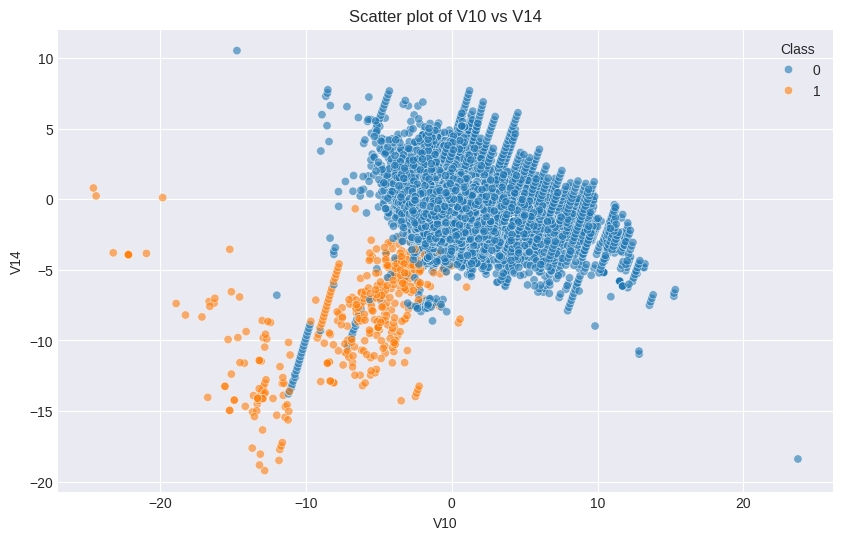

In [ ]:
# Select pairs of features to visualize relationships
selected_pairs = [('Amount', 'Time'), ('V1', 'V2'), ('V3', 'V4'), ('V10', 'V14')]

# Generate scatter plots for selected pairs
for x_feature, y_feature in selected_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_feature, y=y_feature, hue='Class', data=df, alpha=0.6)
    plt.title(f'Scatter plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()

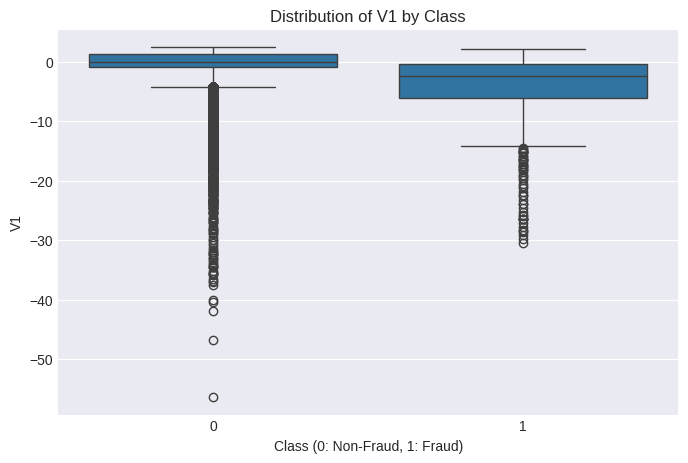

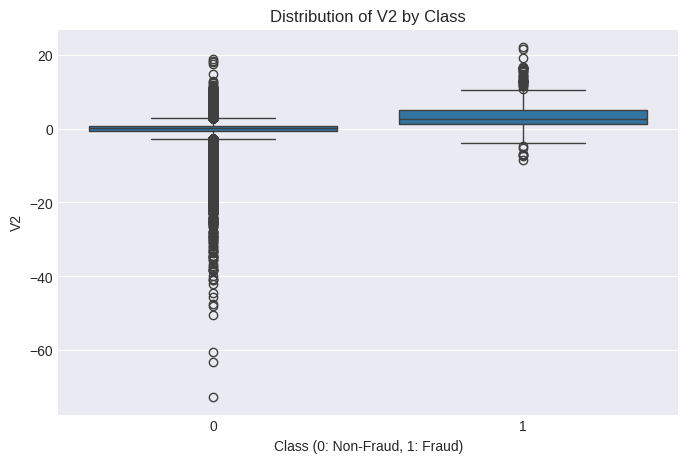

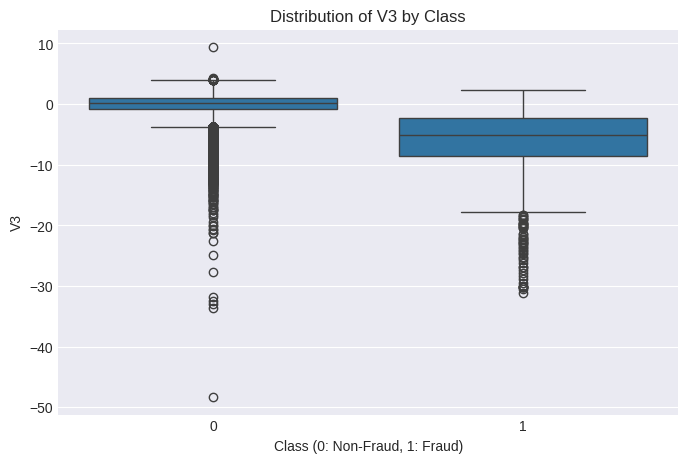

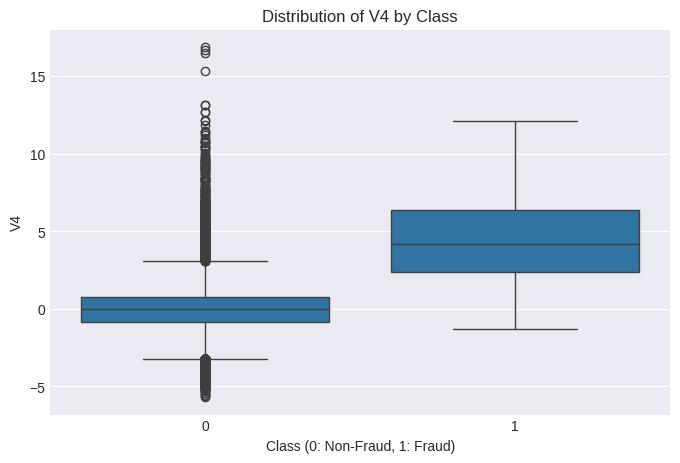

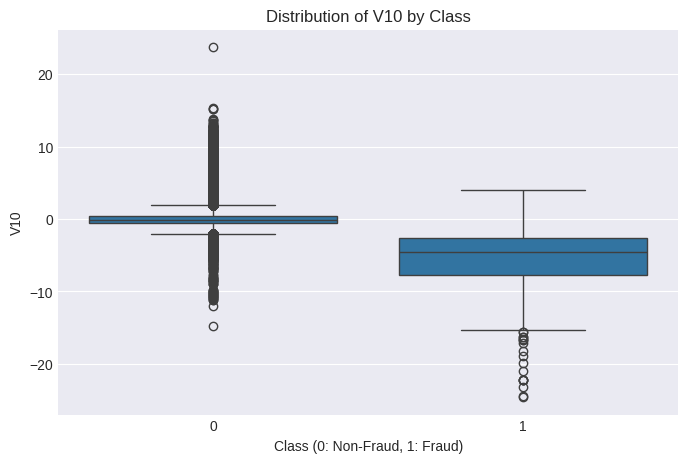

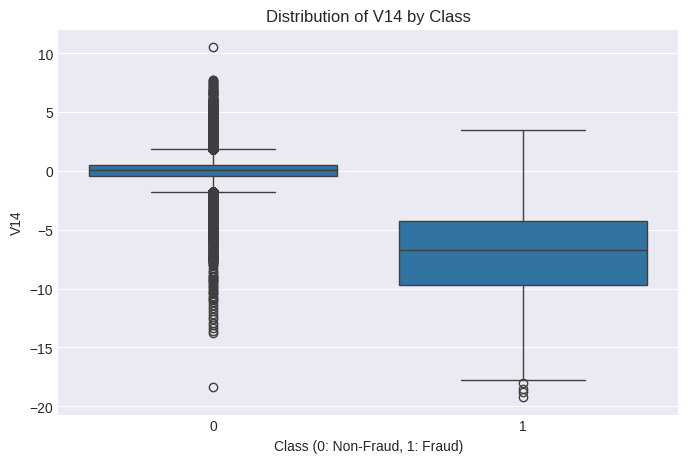

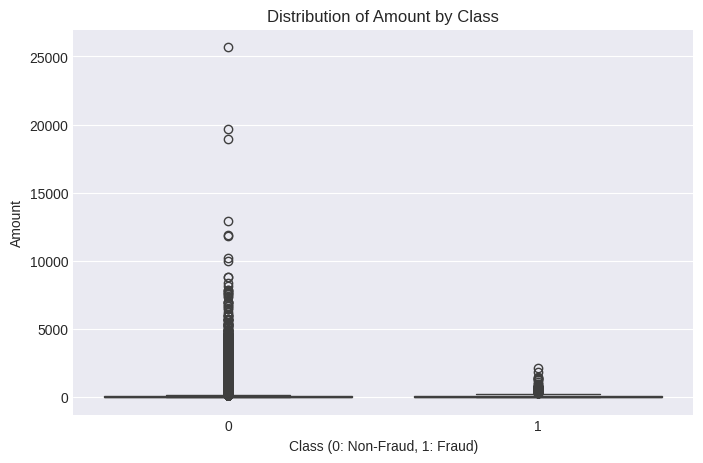

In [ ]:
selected_features = ['V1', 'V2', 'V3', 'V4', 'V10', 'V14', 'Amount']

for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature)
    plt.show()

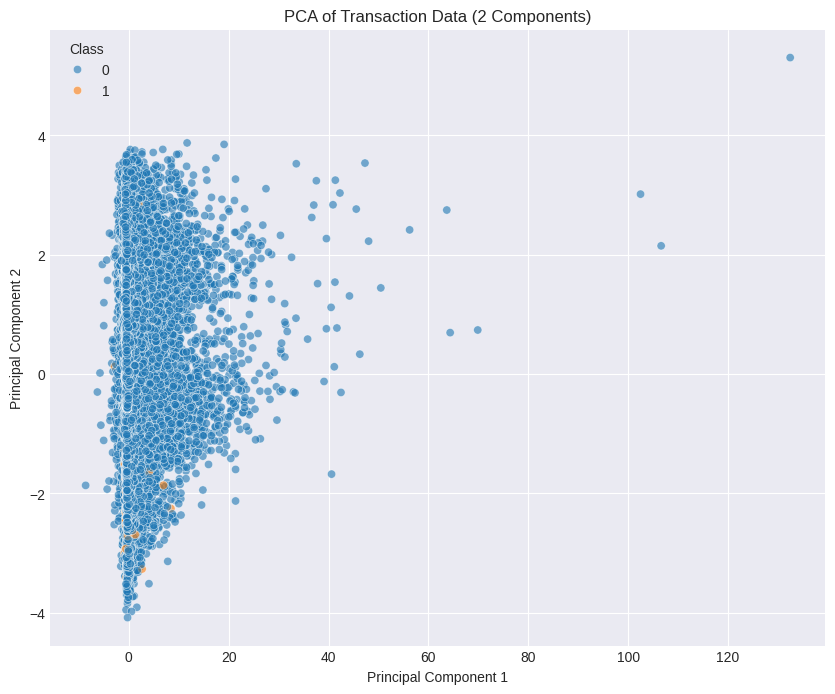

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to a DataFrame
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 4. Concatenate PCA results and target variable
df_pca = pd.concat([X_pca, y], axis=1)

# 5. Create a scatter plot of the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, alpha=0.6)
plt.title('PCA of Transaction Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()